### Programming Assignment 1.1
**kNN (+ Cross Validation): choosing the number of neighbors – for classification problem**

- work with k nearest neighbors method
- choose the parameter k
- correctly prepare data for use in the kNN method

Download the Wine sample at https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

**Find the classification accuracy for cross-validation for the k nearest neighbors method, for k from 1 to 50. At what k is the optimal quality?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

In [4]:
X = pd.read_csv('wine.data', header=None, names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

y = X['Class']
X.drop(columns=['Class'], inplace=True)

kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [5]:
accs = {}
for nghbrs in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=nghbrs)
    accuracy = np.mean(cross_val_score(estimator=model, X=X, y=y, cv=kf))
    accs[nghbrs] = accuracy
    #print(f'Accuracy for {nghbrs} neighbor(s): {accuracy}')

k = max(accs, key=accs.get)
print(f'k = {k}, accuracy = {accs.get(k)}')    

k = 1, accuracy = 0.7466666666666667


**Scale the features using the sklearn.preprocessing.scale function. Find the optimal k again in cross-validation.**

In [300]:
normalized_X = scale(X)

accs = {}
for nghbrs in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=nghbrs)
    accuracy = np.mean(cross_val_score(estimator=model, X=normalized_X, y=y, cv=kf))
    accs[nghbrs] = accuracy
    #print(f'Accuracy for {nghbrs} neighbor(s): {accuracy}')

k = max(accs, key=accs.get)
print(f'k = {k}, accuracy = {accs.get(k)}')

k = 29, accuracy = 0.9776190476190475


In [301]:
# matrix normalization
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

#1
scale(A)

#2
mean = np.mean(A, axis=0)
std = np.std(A, axis=0)
A_norm = (A - mean)/std

In [291]:
# calculate accuracy for every fold manually
# looks like it's a bad idea

#     i = 1
#     for train_index, test_index in kf.split(X):
#         X_train = X.iloc[train_index]
#         X_test = X.iloc[test_index]
#         y_train = y.iloc[train_index]
#         y_test = y.iloc[test_index]

#         model.fit(X_train, y_train)
#         print(f'accuracy for fold #{i} : {accuracy_score(y_test, clf.predict(X_test))}')
#         i += 1 

### Programming Assignment 1.2
**kNN (+ Cross Validation): choosing a metric – for regression problem**

- Choose the optimal metric from the parametric family
- Use the Minkowski metric as a basis. The parameter of the Minkowski metric is the number p, which we will adjust
- We will need to solve the regression problem using the k nearest neighbors method. We will use the Boston dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) in this task, where we need to predict the cost of housing based on various characteristics of the location (air pollution, proximity to roads, etc.).

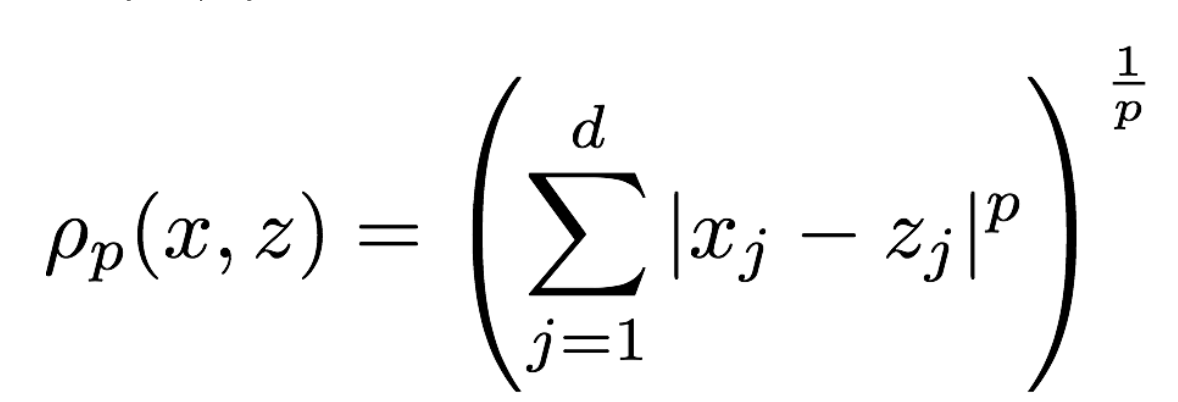

In [449]:
from sklearn.datasets import load_boston

boston = load_boston()
X_norm = scale(boston.data)

splitter = KFold(n_splits=5, random_state=42, shuffle=True)
model = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski')

In [450]:
results = {}

Ps = np.linspace(1, 10, 200)
for p in Ps:
    model.p = p
    accuracy = np.mean(cross_val_score(estimator=model, X=X_norm, y=boston.target, cv=splitter, scoring='neg_mean_squared_error'))
    results[str(p)] = accuracy 

p = max(results, key=results.get)
print(f'p = {p}, accuracy = {results.get(p)}')

p = 1.0, accuracy = -16.030646734221644


#### So euclidean metric (p = 2) is not the best option for this task!

### Programming Assignment 1.3
**Feature normalization**

- work with a perceptron – the simplest version of a linear classifier
- improve the quality of the linear model by normalizing features

In [497]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Data preparation
train = pd.read_csv('perceptron-train.csv', header=None)
test = pd.read_csv('perceptron-test.csv', header=None)

y_train = train[0]
X_train = train.drop(columns=0)

y_test = test[0]
X_test = test.drop(columns=0)

In [505]:
# Perceptron w\o data normalization
model = Perceptron(random_state=241, max_iter=5, tol=None)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.655

In [507]:
# Perceptron w\ data normalization
model = Perceptron(random_state=241, max_iter=5, tol=None)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
model.fit(X_train_norm, y_train)

X_test_norm = scaler.transform(X_test)
accuracy_score(y_test, model.predict(X_test_norm))

0.84

In [508]:
0.84 - 0.655

0.18499999999999994

In [490]:
scaler.fit_transform(X_train)

array([[ 4.86706474e-03,  1.33499892e+00],
       [-9.43323370e-01,  1.23821147e+00],
       [ 3.41902020e-01, -1.46859294e+00],
       [ 2.08121089e-01,  3.35813367e-01],
       [-1.22624550e+00, -7.32950072e-01],
       [ 2.77953452e-01,  3.52700093e-02],
       [-1.83075769e+00, -2.52158659e-01],
       [ 4.96641810e-02,  2.26227468e-02],
       [ 9.48021963e-02, -3.55349782e-01],
       [-6.06032097e-01, -3.38575608e-01],
       [ 9.79935538e-01, -1.02816205e+00],
       [-7.01817586e-01,  7.10992037e-01],
       [-1.21940824e+00,  1.01676970e+00],
       [ 3.11425812e-01,  7.60370075e-01],
       [-1.13031225e-01,  1.40955091e-01],
       [-3.27605081e-01, -2.34727633e-01],
       [-7.83815670e-01,  8.99314258e-01],
       [ 1.33872550e+00,  1.43223920e+00],
       [ 7.67961130e-01, -1.85939445e+00],
       [ 2.73388156e-01,  4.79525582e-01],
       [-8.65703292e-01, -3.68396438e-01],
       [ 9.55766395e-01, -2.70129410e-01],
       [ 1.58856795e-01, -8.83128573e-01],
       [ 6.